In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import tensorflow as tf
import keras
import theano
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop(labels='id', axis=1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Substituting the 'NA' with mean values in BMI column
mean_value = df['bmi'].mean()
df['bmi'].fillna(mean_value, inplace = True)

In [7]:
# Splitting the Dataset
X = df.iloc[:,0:10]
Y = df['stroke']
print(X)
print(Y)

      gender   age  hypertension  ...  avg_glucose_level        bmi   smoking_status
0       Male  67.0             0  ...             228.69  36.600000  formerly smoked
1     Female  61.0             0  ...             202.21  28.893237     never smoked
2       Male  80.0             0  ...             105.92  32.500000     never smoked
3     Female  49.0             0  ...             171.23  34.400000           smokes
4     Female  79.0             1  ...             174.12  24.000000     never smoked
...      ...   ...           ...  ...                ...        ...              ...
5105  Female  80.0             1  ...              83.75  28.893237     never smoked
5106  Female  81.0             0  ...             125.20  40.000000     never smoked
5107  Female  35.0             0  ...              82.99  30.600000     never smoked
5108    Male  51.0             0  ...             166.29  25.600000  formerly smoked
5109  Female  44.0             0  ...              85.28  26.2000

In [8]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding the 'Gender' column
labelencoder_X_1 = LabelEncoder()
X['gender'] = labelencoder_X_1.fit_transform(X['gender'])

# Encoding the 'ever_married' column
labelencoder_X_2 = LabelEncoder()
X['ever_married'] = labelencoder_X_1.fit_transform(X['ever_married'])

# Encoding the 'work_type' column
labelencoder_X_3 = LabelEncoder()
X['work_type'] = labelencoder_X_1.fit_transform(X['work_type'])

# Encoding the 'residence_type' column
labelencoder_X_4 = LabelEncoder()
X['Residence_type'] = labelencoder_X_1.fit_transform(X['Residence_type'])

# Encoding the 'smoking_status' column
labelencoder_X_4 = LabelEncoder()
X['smoking_status'] = labelencoder_X_1.fit_transform(X['smoking_status'])

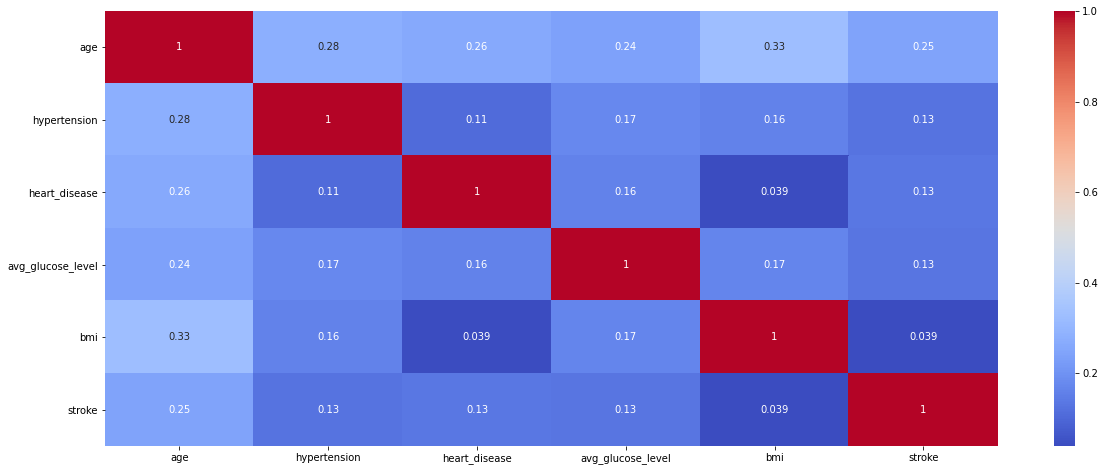

In [9]:
# Plotting the correlation heatmap
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [10]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Building the ANN model

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential()

In [13]:
# Adding the Input Layer and the First Hidden Layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the model

In [15]:
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50
384/384 [==============================] - 1s 1ms/step - loss: 0.2913 - accuracy: 0.9494
Epoch 2/50
384/384 [==============================] - 0s 1ms/step - loss: 0.2146 - accuracy: 0.9520
Epoch 3/50
384/384 [==============================] - 1s 1ms/step - loss: 0.1913 - accuracy: 0.9520
Epoch 4/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9520
Epoch 5/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.9520
Epoch 6/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9520
Epoch 7/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9520
Epoch 8/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9520
Epoch 9/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9520
Epoch 10/50
384/384 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9520

## Generating Predictions

In [17]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[[1.6305837e-01]
 [1.1735710e-04]
 [6.4816535e-02]
 ...
 [3.1358635e-05]
 [1.0644913e-02]
 [2.9411107e-02]]


In [18]:
Y_pred = (Y_pred>0.5)
print(Y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [19]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred))
print(cm)

      0  1
0  1213  0
1    65  0
